In [ ]:
import os, cv2, keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import h5py
from keras.models import load_model

In [ ]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [ ]:
model = tf.keras.models.model_from_json(open('/content/drive/MyDrive/lab3/Comp_Vision_Task_3_model.json').read())
model.load_weights('/content/drive/MyDrive/lab3/ieeercnn_vgg16_1.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

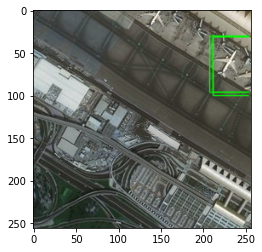

In [ ]:
filename = "/content/drive/MyDrive/lab3/428451.jpg"
results_list = []
orig_img = cv2.imread(filename)
ss.setBaseImage(orig_img)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = orig_img.copy()

img_for_predict = cv2.imread(filename)
ss.setBaseImage(img_for_predict)
ss.switchToSelectiveSearchFast()
_ssresults = ss.process()

for e,result in enumerate(_ssresults):
    if e < 10000:
        x,y,w,h = result
        timage = img_for_predict[y: y + h,x: x + w]
        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
        img = np.expand_dims(resized, axis = 0)
        out = model.predict(img)
        if out[0][0] > 0.65:
            cv2.rectangle(imout, (x, y), (x + w, y + h), (0, 255, 0), 1, cv2.LINE_AA)
            results_list.append({"prob": out[0][0], "x": x, "y": y, "w": w, "h": h})
plt.figure()
plt.imshow(imout)

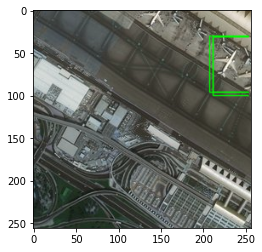

In [ ]:
filename = "/content/drive/MyDrive/lab3/428451.jpg"
results_list = []
orig_img = cv2.imread(filename)
ss.setBaseImage(orig_img)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = orig_img.copy()

img_for_predict = cv2.imread(filename)
ss.setBaseImage(img_for_predict)
ss.switchToSelectiveSearchFast()
_ssresults = ss.process()

for e,result in enumerate(_ssresults):
    if e < 10000:
        x,y,w,h = result
        timage = img_for_predict[y: y + h,x: x + w]
        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
        img = np.expand_dims(resized, axis = 0)
        out = model.predict(img)
        if out[0][0] > 0.65:
            cv2.rectangle(imout, (x, y), (x + w, y + h), (0, 255, 0), 1, cv2.LINE_AA)
            results_list.append({"prob": out[0][0], "x": x, "y": y, "w": w, "h": h})
plt.figure()
plt.imshow(imout)

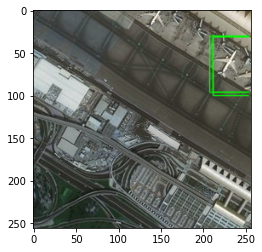

In [ ]:
filename = "/content/drive/MyDrive/lab3/428451.jpg"
results_list = []
orig_img = cv2.imread(filename)
ss.setBaseImage(orig_img)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = orig_img.copy()

img_for_predict = cv2.imread(filename)
ss.setBaseImage(img_for_predict)
ss.switchToSelectiveSearchFast()
_ssresults = ss.process()

for e,result in enumerate(_ssresults):
    if e < 10000:
        x,y,w,h = result
        timage = img_for_predict[y: y + h,x: x + w]
        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
        img = np.expand_dims(resized, axis = 0)
        out = model.predict(img)
        if out[0][0] > 0.65:
            cv2.rectangle(imout, (x, y), (x + w, y + h), (0, 255, 0), 1, cv2.LINE_AA)
            results_list.append({"prob": out[0][0], "x": x, "y": y, "w": w, "h": h})
plt.figure()
plt.imshow(imout)

In [ ]:
print(len(results_list))
sorted_list = sorted(results_list, key=lambda k: k['prob']) 
for res in sorted_list:
    print("Prob: {} X: {} Y: {} W: {} H: {}".format(res['prob'], res['x'], res['y'], res['w'], res['h']))

3
Prob: 0.7043829560279846 X: 211 Y: 31 W: 45 H: 69
Prob: 0.7326531410217285 X: 211 Y: 31 W: 45 H: 65
Prob: 0.8147062063217163 X: 207 Y: 30 W: 49 H: 66
